In [1]:
from load_data import load
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, LeakyReLU

In [3]:
(train_data, train_labels, test_data, test_labels) = load()

In [4]:
train_data.shape

(50000, 32, 32, 3)

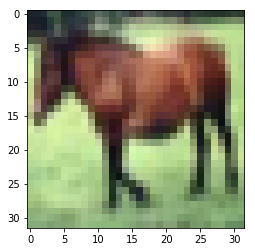

In [5]:
plt.imshow(train_data[7])

In [6]:
model = Sequential()
model.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(32,32,3)))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(MaxPool2D())

In [7]:
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
sm_cb = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='../checkpoints/best_with_more_leaky.hdf5', verbose=1, save_best_only=True)
history = model.fit(train_data, train_labels, verbose=2, epochs=1000, validation_split=0.2, shuffle=True, callbacks=[es_cb, sm_cb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/1000

Epoch 00001: val_loss improved from inf to 1.11868, saving model to ../checkpoints/best_with_more_leaky.hdf5
40000/40000 - 14s - loss: 1.5004 - accuracy: 0.4769 - val_loss: 1.1187 - val_accuracy: 0.5981
Epoch 2/1000

Epoch 00002: val_loss improved from 1.11868 to 1.03174, saving model to ../checkpoints/best_with_more_leaky.hdf5
40000/40000 - 11s - loss: 1.0979 - accuracy: 0.6130 - val_loss: 1.0317 - val_accuracy: 0.6419
Epoch 3/1000

Epoch 00003: val_loss improved from 1.03174 to 0.81474, saving model to ../checkpoints/best_with_more_leaky.hdf5
40000/40000 - 11s - loss: 0.9386 - accuracy: 0.6700 - val_loss: 0.8147 - val_accuracy: 0.7135
Epoch 4/1000

Epoch 00004: val_loss did not improve from 0.81474
40000/40000 - 11s - loss: 0.8404 - accuracy: 0.7060 - val_loss: 0.8891 - val_accuracy: 0.7000
Epoch 5/1000

Epoch 00005: val_loss improved from 0.81474 to 0.75731, saving model to ../checkpoints/best_with_more_leaky.hdf5
40000

Text(0, 0.5, 'Loss (Categorical Cross Entropy)')

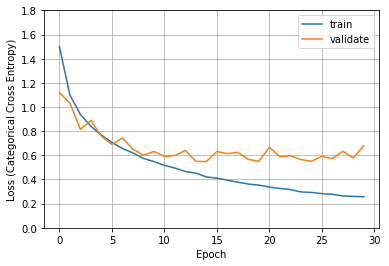

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validate'], loc='upper right')
plt.ylim(0, 1.8)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss (Categorical Cross Entropy)')

In [12]:
test_labels = np.array(test_labels, dtype='uint8')
model.load_weights('../checkpoints/best_with_more_leaky.hdf5')
model.evaluate(test_data, test_labels, verbose=0)

[0.5650564381599427, 0.8103]